In [27]:
import networkx as nx
import matplotlib.pyplot as plt

<img src="map.png" alt="map" width="450"/>

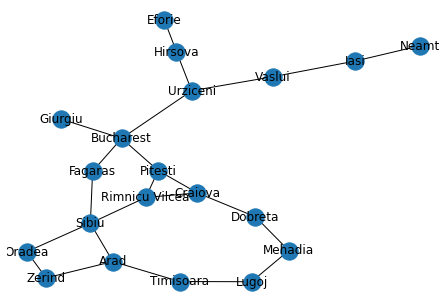

In [33]:
# Build the graph as depicted above
nodes = [
    "Arad",
    "Timisoara",
    "Zerind",
    "Oradea",
    "Sibiu",
    "Fagaras",
    "Bucharest",
    "Rimnicu Vilcea",
    "Lugoj",
    "Mehadia",
    "Dobreta",
    "Craiova",
    "Pitesti",
    "Giurgiu",
    "Urziceni",
    "Hirsova",
    "Eforie",
    "Vaslui",
    "Iasi",
    "Neamt"
]

edges = [
    ('Arad', 'Timisoara', {'weight':118}),
    ('Lugoj', 'Timisoara', {'weight':111}),
    ('Lugoj', 'Mehadia', {'weight':70}),
    ('Dobreta', 'Mehadia', {'weight':75}),
    ('Dobreta', 'Craiova', {'weight':120}),
    ('Rimnicu Vilcea', 'Craiova', {'weight':146}),
    ('Pitesti', 'Craiova', {'weight':138}),
    ('Arad', 'Zerind', {'weight':75}),
    ('Arad', 'Sibiu', {'weight':140}),
    ('Zerind', 'Oradea', {'weight': 71}),
    ('Oradea', 'Sibiu', {'weight': 71}),
    ('Sibiu', 'Fagaras', {'weight': 99}),
    ('Sibiu', 'Rimnicu Vilcea', {'weight': 80}),
    ('Fagaras', 'Bucharest', {'weight': 211}),
    ('Rimnicu Vilcea', 'Pitesti', {'weight': 97}),
    ('Pitesti', 'Bucharest', {'weight': 101}),
    ('Giurgiu', 'Bucharest', {'weight': 90}),
    ('Urziceni', 'Bucharest', {'weight': 85}),
    ('Urziceni', 'Hirsova', {'weight': 98}),
    ('Eforie', 'Hirsova', {'weight': 86}),
    ('Urziceni', 'Vaslui', {'weight': 142}),
    ('Iasi', 'Vaslui', {'weight': 92}),
    ('Iasi', 'Neamt', {'weight': 87}),
]

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

# Uncomment below to display edge weights
# edge_labels = dict([((n1, n2), G[n1][n2]['weight']) for n1, n2 in G.edges])
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
# plt.show()

In [29]:
# heuristic function
def mne(node):
    return node[0].upper()

sld_bucharest = {
    'A': 366,
    'B': 0,
    'C': 160,
    'D': 242,
    'E': 161,
    'F': 178,
    'G': 77,
    'H': 151,
    'I': 226,
    'L': 244,
    'M': 241,
    'N': 234,
    'O': 380,
    'P': 98,
    'R': 193,
    'S': 253,
    'T': 329,
    'U': 80,
    'V': 199,
    'Z': 374
}


def sld(a, b):
    if a == 'Bucharest':
        return sld_bucharest[mne(b)]
    elif b == 'Bucharest':
        return sld_bucharest[mne(a)]
    else: 
        return 1000
    

In [34]:
nx.astar_path(G, 'Arad', 'Bucharest', heuristic=sld, weight="weight")

['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']